### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
humidity_df = pd.read_csv('weather/humidity.csv')
pressure_df = pd.read_csv('weather/pressure.csv')
temperature_df = pd.read_csv('weather/temperature.csv')
weather_description_df = pd.read_csv('weather/weather_description.csv')
wind_direction_df = pd.read_csv('weather/wind_direction.csv')
wind_speed_df = pd.read_csv('weather/wind_speed.csv')
wind_direction_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0


In [3]:
humidity = humidity_df[['datetime', 'Phoenix']]
pressure = pressure_df[['datetime', 'Phoenix']]
temperature = temperature_df[['datetime', 'Phoenix']]
weather_description = weather_description_df[['datetime', 'Phoenix']]
wind_direction = wind_direction_df[['datetime', 'Phoenix']]
wind_speed = wind_speed_df[['datetime', 'Phoenix']]


In [4]:
weather_df = (weather_description.merge(humidity, on = 'datetime')
             .merge(pressure, on = 'datetime')
             .merge(temperature, on = 'datetime')
             .merge(wind_direction, on = 'datetime')
             .merge(wind_speed, on = 'datetime')
             )
weather_df.columns = ['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed']
#weather_df['Temperature_C'] = weather_df['Temperature'] - 273.15
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,sky is clear,23.0,1013.0,296.600000,10.0,2.0
2,2012-10-01 14:00:00,sky is clear,23.0,1013.0,296.608509,9.0,2.0
3,2012-10-01 15:00:00,sky is clear,23.0,1013.0,296.631487,9.0,2.0
4,2012-10-01 16:00:00,sky is clear,23.0,1013.0,296.654466,9.0,2.0


### Cleaning the data

In [5]:
missing_data = weather_df.isnull().sum().sort_values(ascending=False)
percentage_missing_data = weather_df.isnull().sum()/weather_df.isnull().count().sort_values(ascending = False) * 100
missing_values = pd.concat([missing_data, percentage_missing_data], axis=1, keys=['missing_data', 'percentage'])
missing_values

,missing_data,percentage
Humidity,1308,2.890416
Pressure,594,1.312620
Temperature,3,0.006629
Wind_Speed,2,0.004420
Wind_Direction,1,0.002210
Description,1,0.002210
Datetime,0,0.000000


In [6]:
weather_df.corr()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
Humidity,1.000000,0.210850,-0.547354,-0.119320,-0.170007
Pressure,0.210850,1.000000,-0.388486,-0.136615,-0.079574
Temperature,-0.547354,-0.388486,1.000000,0.136312,0.226715
Wind_Direction,-0.119320,-0.136615,0.136312,1.000000,0.182711
Wind_Speed,-0.170007,-0.079574,0.226715,0.182711,1.000000


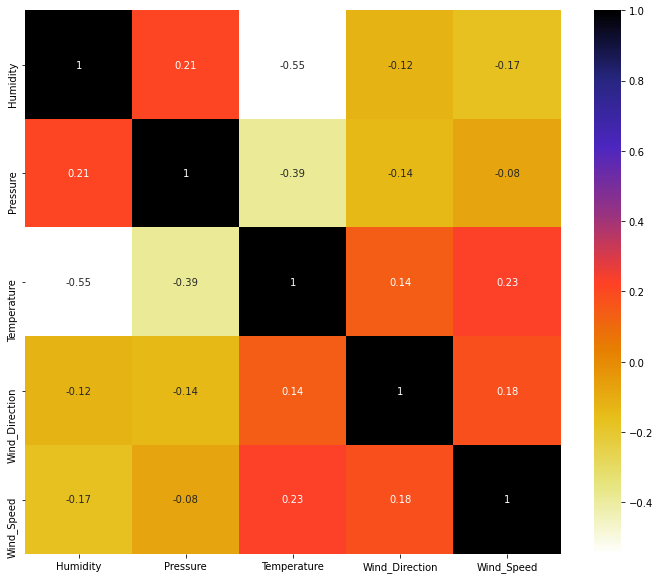

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = weather_df.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        45253 non-null  object 
 1   Description     45252 non-null  object 
 2   Humidity        43945 non-null  float64
 3   Pressure        44659 non-null  float64
 4   Temperature     45250 non-null  float64
 5   Wind_Direction  45252 non-null  float64
 6   Wind_Speed      45251 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [9]:
#Convert dates to datetime format
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime']);
weather_df['Datetime'].head()

0   2012-10-01 12:00:00
1   2012-10-01 13:00:00
2   2012-10-01 14:00:00
3   2012-10-01 15:00:00
4   2012-10-01 16:00:00
Name: Datetime, dtype: datetime64[ns]

In [10]:
#Filling the numerical Null values with mean
weather_df['Humidity'] = weather_df['Humidity'].fillna(weather_df['Humidity'].median())
weather_df['Pressure'] = weather_df['Pressure'].fillna(weather_df['Pressure'].median())
weather_df['Temperature'] = weather_df['Temperature'].fillna(weather_df['Temperature'].median())
weather_df['Wind_Direction'] = weather_df['Wind_Direction'].fillna(weather_df['Wind_Direction'].median())
weather_df['Wind_Speed'] = weather_df['Wind_Speed'].fillna(weather_df['Wind_Speed'].median())

In [11]:
#Filling the categorical values with mode
weather_df['Description'] = weather_df['Description'].fillna(weather_df['Description'].mode()[0])

In [12]:
weather_df.isnull().sum()

Datetime          0
Description       0
Humidity          0
Pressure          0
Temperature       0
Wind_Direction    0
Wind_Speed        0
dtype: int64

### Univariate Visualization

This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. 

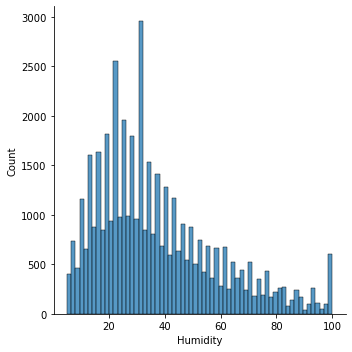

In [13]:
sns.displot(data=weather_df, x="Humidity")

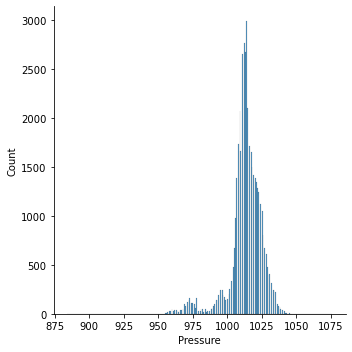

In [14]:
sns.displot(data=weather_df, x="Pressure")

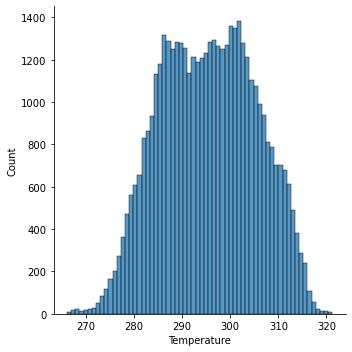

In [15]:
sns.displot(data=weather_df, x="Temperature")

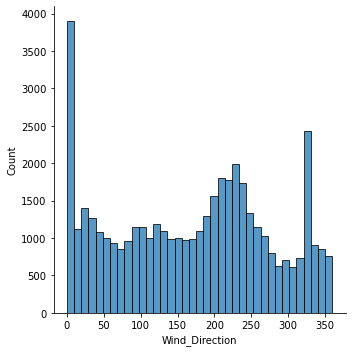

In [16]:
sns.displot(data=weather_df, x="Wind_Direction")

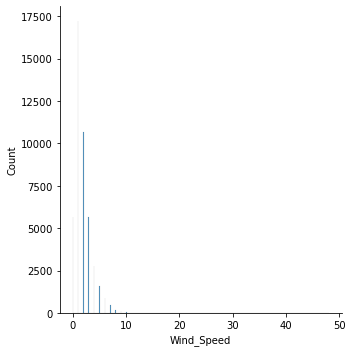

In [17]:
sns.displot(data=weather_df, x="Wind_Speed")

### MULTIVARIATE VISUALIZATION

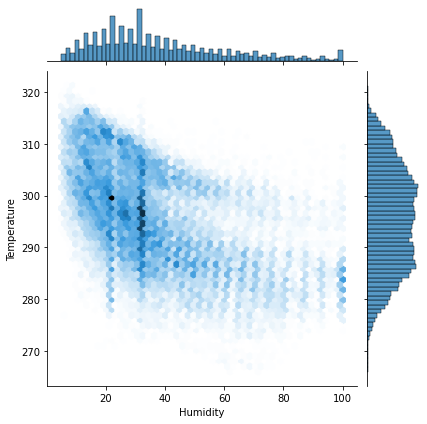

In [18]:
#Draws a probability density function(PDF)
sns.jointplot(x='Humidity', y='Temperature', data=weather_df, kind='hex')

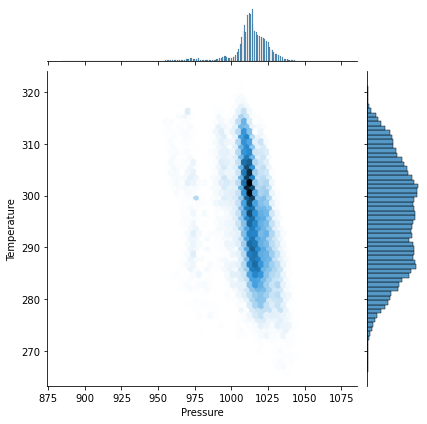

In [19]:
#Draws a probability density function(PDF)
sns.jointplot(x='Pressure', y='Temperature', data=weather_df, kind='hex')

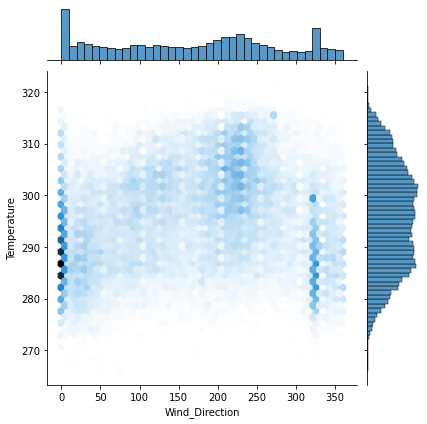

In [20]:
#Draws a probability density function(PDF)
sns.jointplot(x='Wind_Direction', y='Temperature', data=weather_df, kind='hex')

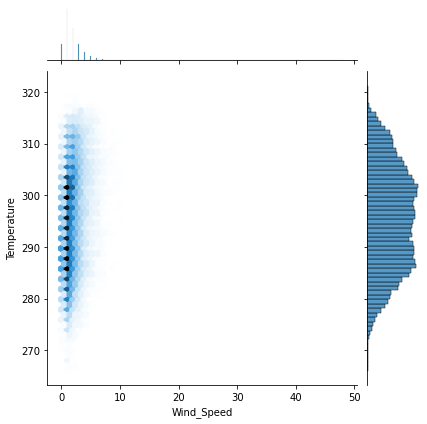

In [21]:
#Draws a probability density function(PDF)
sns.jointplot(x='Wind_Speed', y='Temperature', data=weather_df, kind='hex')


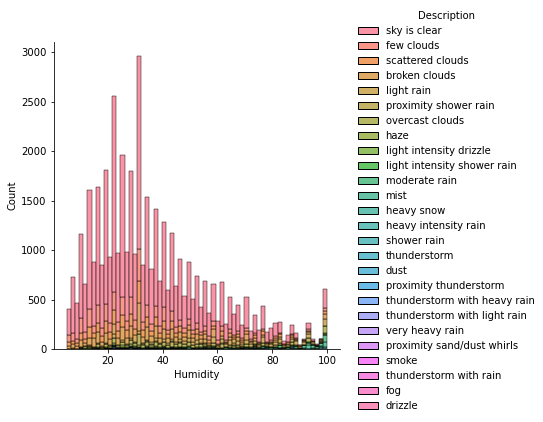

In [22]:
sns.displot(data=weather_df, x="Humidity", hue="Description", multiple="stack")

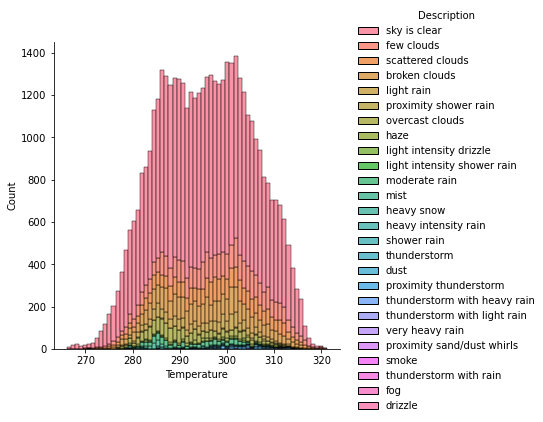

In [23]:
sns.displot(data=weather_df, x="Temperature", hue="Description", multiple="stack")


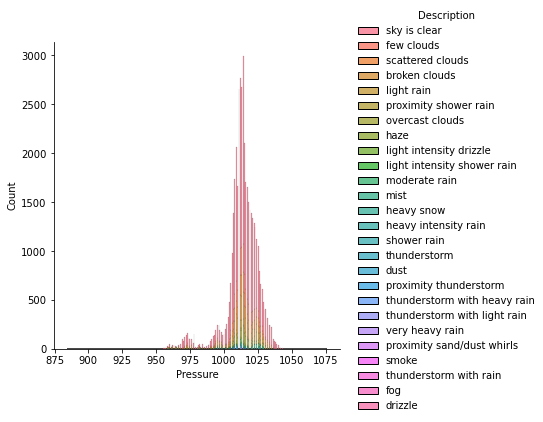

In [24]:
sns.displot(data=weather_df, x="Pressure", hue="Description", multiple="stack")


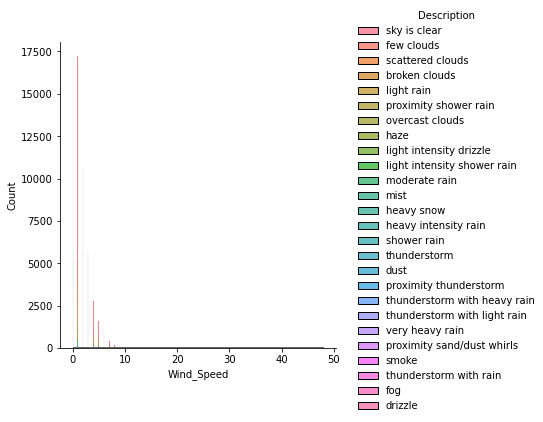

In [25]:
sns.displot(data=weather_df, x="Wind_Speed", hue="Description", multiple="stack")


In [26]:
weather_df.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
count,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000
mean,37.325901,1013.306565,295.493364,168.564603,1.909023
std,21.367120,11.910106,9.916414,107.531920,1.623605
min,5.000000,884.000000,266.059000,0.000000,0.000000
25%,22.000000,1009.000000,287.680000,74.000000,1.000000
50%,32.000000,1014.000000,295.586667,180.000000,1.000000
75%,49.000000,1020.000000,303.050000,250.000000,3.000000
max,100.000000,1076.000000,321.220000,360.000000,48.000000


### Normalization of data

In [27]:
train_df = weather_df[['Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed']]
train_df

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,32.0,1014.0,295.586667,180.0,1.0
1,23.0,1013.0,296.600000,10.0,2.0
2,23.0,1013.0,296.608509,9.0,2.0
3,23.0,1013.0,296.631487,9.0,2.0
4,23.0,1013.0,296.654466,9.0,2.0
...,...,...,...,...,...
45248,68.0,1018.0,294.710000,350.0,3.0
45249,73.0,1018.0,295.590000,179.0,1.0
45250,60.0,1017.0,296.250000,130.0,2.0
45251,33.0,1016.0,297.150000,320.0,3.0


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)
normalised_df

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,0.284211,0.677083,0.535300,0.500000,0.020833
1,0.189474,0.671875,0.553670,0.027778,0.041667
2,0.189474,0.671875,0.553824,0.025000,0.041667
3,0.189474,0.671875,0.554241,0.025000,0.041667
4,0.189474,0.671875,0.554658,0.025000,0.041667
...,...,...,...,...,...
45248,0.663158,0.697917,0.519407,0.972222,0.062500
45249,0.715789,0.697917,0.535360,0.497222,0.020833
45250,0.578947,0.692708,0.547325,0.361111,0.041667
45251,0.294737,0.687500,0.563641,0.888889,0.062500


In [29]:
from sklearn import preprocessing
print(weather_df['Description'].unique())
description_df = weather_df['Description']
enc = preprocessing.LabelEncoder()
enc.fit(description_df)
description_df = enc.transform(description_df)
print(description_df)

['sky is clear' 'few clouds' 'scattered clouds' 'broken clouds'
 'light rain' 'proximity shower rain' 'overcast clouds' 'haze'
 'light intensity drizzle' 'light intensity shower rain' 'moderate rain'
 'mist' 'heavy snow' 'heavy intensity rain' 'shower rain' 'thunderstorm'
 'dust' 'proximity thunderstorm' 'thunderstorm with heavy rain'
 'thunderstorm with light rain' 'very heavy rain'
 'proximity sand/dust whirls' 'smoke' 'thunderstorm with rain' 'fog'
 'drizzle']
[19 19 19 ... 19  0  0]


In [30]:
description_df.dtype

dtype('int64')

In [31]:
description_df = pd.DataFrame(description_df)
description_df.columns = ['Description']
description_df

,Description
0,19
1,19
2,19
3,19
4,19
...,...
45248,19
45249,19
45250,19
45251,0


In [32]:
weather = np.concatenate([normalised_df, description_df], axis =1)
weather = pd.DataFrame(weather)
weather.columns =['Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed', 'Description']
weather.head()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Description
0,0.284211,0.677083,0.535300,0.500000,0.020833,19.0
1,0.189474,0.671875,0.553670,0.027778,0.041667,19.0
2,0.189474,0.671875,0.553824,0.025000,0.041667,19.0
3,0.189474,0.671875,0.554241,0.025000,0.041667,19.0
4,0.189474,0.671875,0.554658,0.025000,0.041667,19.0


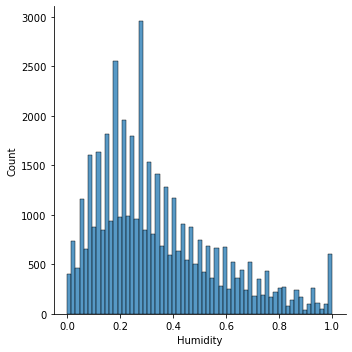

In [33]:
sns.displot(data=weather, x="Humidity")

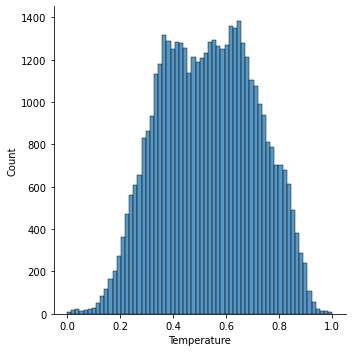

In [34]:
sns.displot(data=weather, x="Temperature")